In [1]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [2]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

2.13.0


In [3]:
# Import other libraries
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

In [4]:
with np.load('public_data.npz', allow_pickle=True) as public_data:
    data = public_data['data']
    labels = public_data['labels']

In [5]:
def load_images(data):
    images = []
    for img in data:
        img = (img / 255).astype(np.float32)
        if img is not None:
            images.append(img)

    return np.array(images)
images = load_images(data)

In [6]:
healthy_idxs = np.where(labels == 'healthy')[0]
unhealthy_idxs = np.where(labels == 'unhealthy')[0]
print(f'Number of healthy class: {len(healthy_idxs)}')
print(f'Number of unhealthy class: {len(unhealthy_idxs)}')
print(f'First 10 heatlhy idxs: {healthy_idxs[:10]}')
print(f'First 10 unhealthy idxs: {unhealthy_idxs[:10]}')

Number of healthy class: 3199
Number of unhealthy class: 2001
First 10 heatlhy idxs: [ 0  1  2  5  7  8  9 10 11 12]
First 10 unhealthy idxs: [ 3  4  6 13 14 16 19 23 26 30]


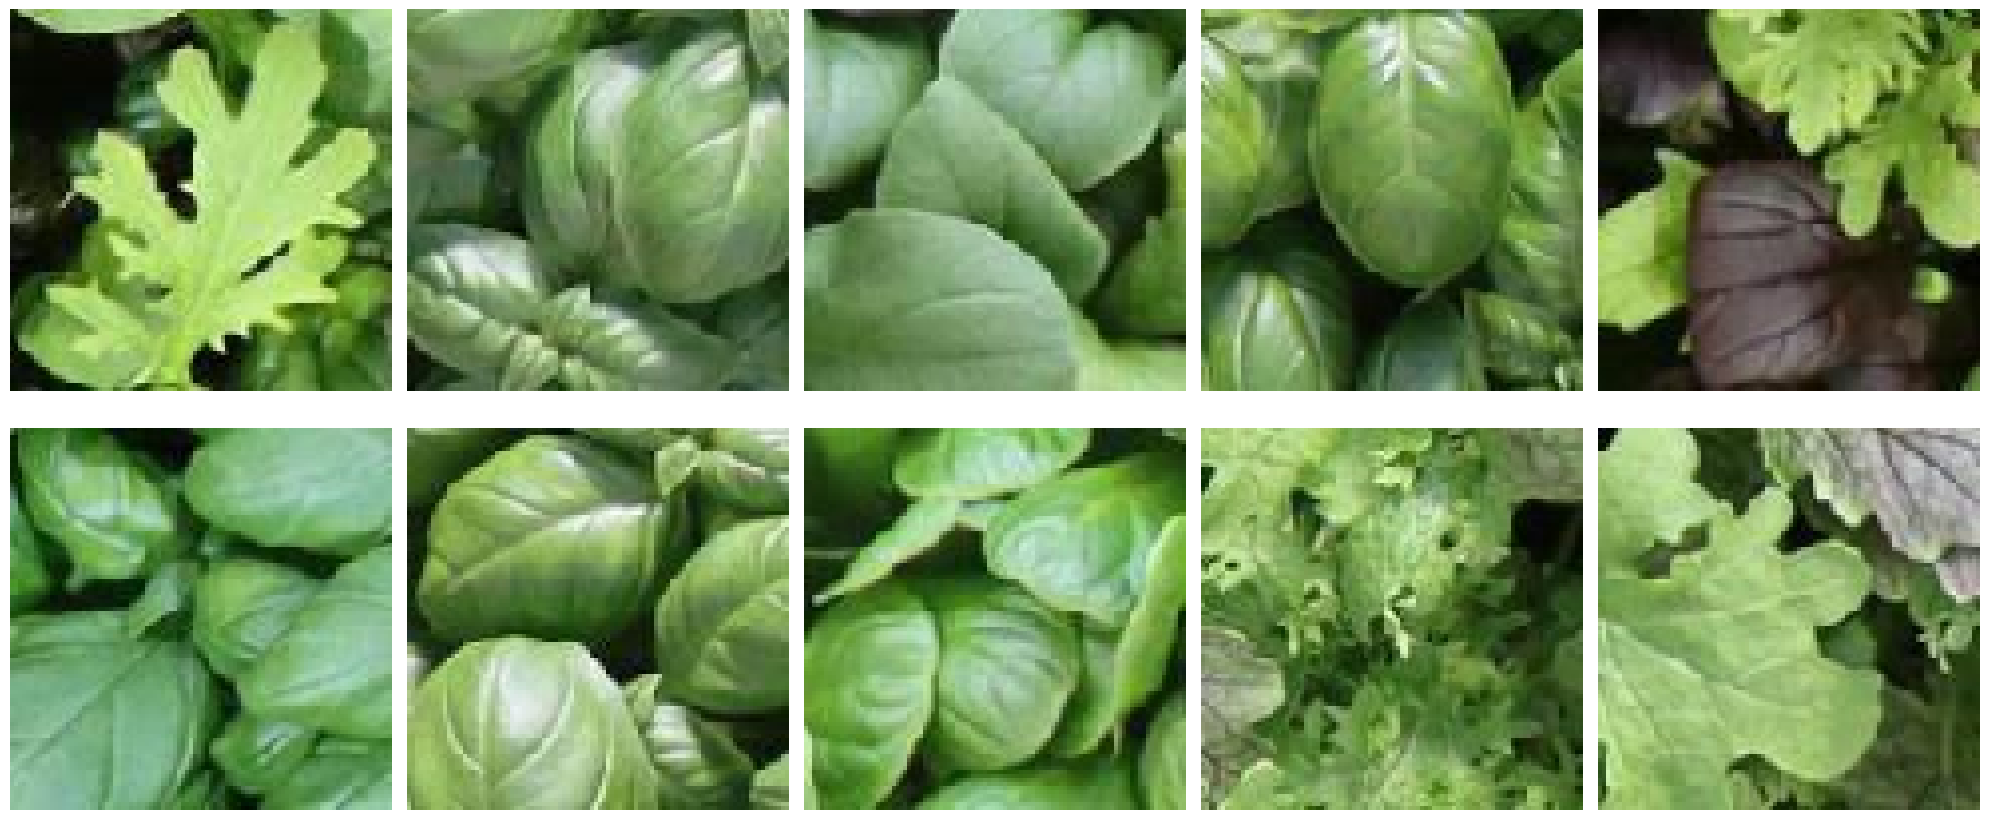

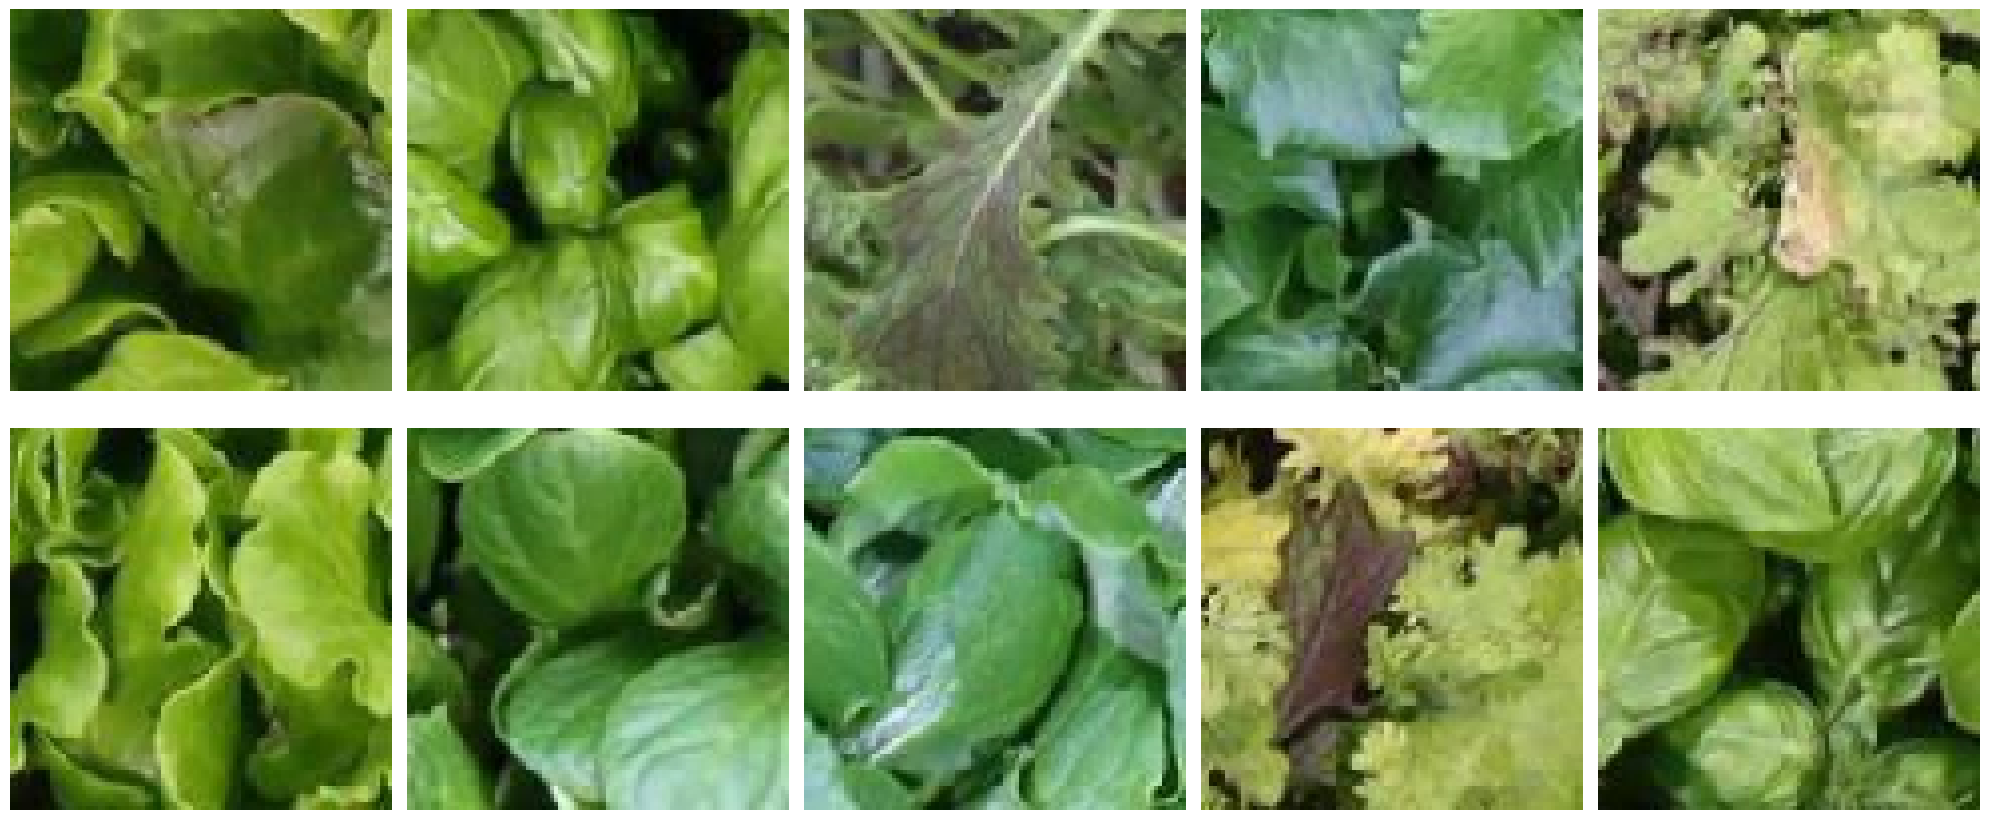

In [7]:
# Number of images to display
num_img = 10

# Create subplots for healthy plants
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i%2, i%num_img//2]
    ax.imshow(np.clip(images[healthy_idxs[i]], 0, 255))  # Display clipped item images
    ax.axis('off')
plt.tight_layout()
plt.show()

# Create subplots for displaying unhealthy plants
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i%2, i%num_img//2]
    ax.imshow(np.clip(images[unhealthy_idxs[i]], 0, 255))  # Display clipped item images
    ax.axis('off')
plt.tight_layout()
plt.show()